# Network Node Distribution

In [39]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
print(ad.__version__)

0.11.4


In [40]:
# There are 9 excel files in the folder results
# The excel files have two collumns: 'Gene' and 'Number of Significant Differences'

# The excel files are named: "results/{}_significant_differences.xlsx".format(cell_type)
cell_types = [
    "CD8-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta memory T cell",
    "CD4-positive, alpha-beta T cell",
    "central memory CD4-positive, alpha-beta T cell",
    "effector memory CD4-positive, alpha-beta T cell",
    "gamma-delta T cell",
    "regulatory T cell",
    "double negative T regulatory cell",
    "innate lymphoid cell"
]

# Load all the excel files into separate dictionaries
excel_files_networks = {}

for cell_type in cell_types:
    file_path = f"results/network/young_old/{cell_type}_gene_associations.xlsx"
    excel_files_networks[cell_type] = pd.read_excel(file_path)
    

In [41]:
import ast

for cell_type, df in excel_files_networks.items():
    print(f"Cell Type: {cell_type}")
    
    # Convert string representation of list to actual list
    df['Associated Genes'] = df['Associated Genes'].apply(ast.literal_eval)
    
    # Now you can access the first gene list properly
    first_gene = df.iloc[0]['Gene']
    first_element = df.iloc[0]['Associated Genes']  # Now a list, not a string
    first_element_first = first_element[0]
    print(f"First Gene: {first_gene}, {type(first_gene)}")
    print(f"First Associated Gene: {first_element_first}, {type(first_element_first)}")
    
    
    print(f"First Gene: {first_gene}, {type(first_gene)}")
    print(f"First Associated Gene: {first_element}, {type(first_element)}")
    print("\n")

Cell Type: CD8-positive, alpha-beta T cell
First Gene: ENSG00000101608, <class 'str'>
First Associated Gene: ENSG00000116251, <class 'str'>
First Gene: ENSG00000101608, <class 'str'>
First Associated Gene: ['ENSG00000116251', 'ENSG00000142634', 'ENSG00000142676', 'ENSG00000133226', 'ENSG00000126709', 'ENSG00000184007', 'ENSG00000182866', 'ENSG00000116560', 'ENSG00000142937', 'ENSG00000122406', 'ENSG00000143384', 'ENSG00000177954', 'ENSG00000160710', 'ENSG00000081237', 'ENSG00000159388', 'ENSG00000162894', 'ENSG00000009790', 'ENSG00000143761', 'ENSG00000143774', 'ENSG00000119801', 'ENSG00000115875', 'ENSG00000143947', 'ENSG00000158050', 'ENSG00000121966', 'ENSG00000153234', 'ENSG00000197756', 'ENSG00000188042', 'ENSG00000144713', 'ENSG00000188846', 'ENSG00000162244', 'ENSG00000163660', 'ENSG00000182899', 'ENSG00000071127', 'ENSG00000137441', 'ENSG00000109787', 'ENSG00000168421', 'ENSG00000109475', 'ENSG00000164096', 'ENSG00000145425', 'ENSG00000168685', 'ENSG00000145592', 'ENSG000001518

In [42]:
# For each cell type, print the head of the dataframe
for cell_type, df in excel_files_networks.items():
    print(f"Cell Type: {cell_type}")
    print(df.head())
    print("\n")

Cell Type: CD8-positive, alpha-beta T cell
              Gene                                   Associated Genes
0  ENSG00000101608  [ENSG00000116251, ENSG00000142634, ENSG0000014...
1  ENSG00000159388  [ENSG00000116251, ENSG00000142634, ENSG0000014...
2  ENSG00000010404  [ENSG00000077549, ENSG00000133226, ENSG0000014...
3  ENSG00000124614  [ENSG00000117616, ENSG00000131236, ENSG0000014...
4  ENSG00000128340  [ENSG00000077549, ENSG00000142676, ENSG0000013...


Cell Type: CD8-positive, alpha-beta memory T cell
              Gene                                   Associated Genes
0  ENSG00000122026  [ENSG00000074800, ENSG00000077549, ENSG0000014...
1  ENSG00000177954  [ENSG00000116251, ENSG00000074800, ENSG0000007...
2  ENSG00000124942  [ENSG00000116251, ENSG00000074800, ENSG0000007...
3  ENSG00000145592  [ENSG00000116251, ENSG00000074800, ENSG0000007...
4  ENSG00000137076  [ENSG00000116251, ENSG00000074800, ENSG0000007...


Cell Type: CD4-positive, alpha-beta T cell
              Gene  

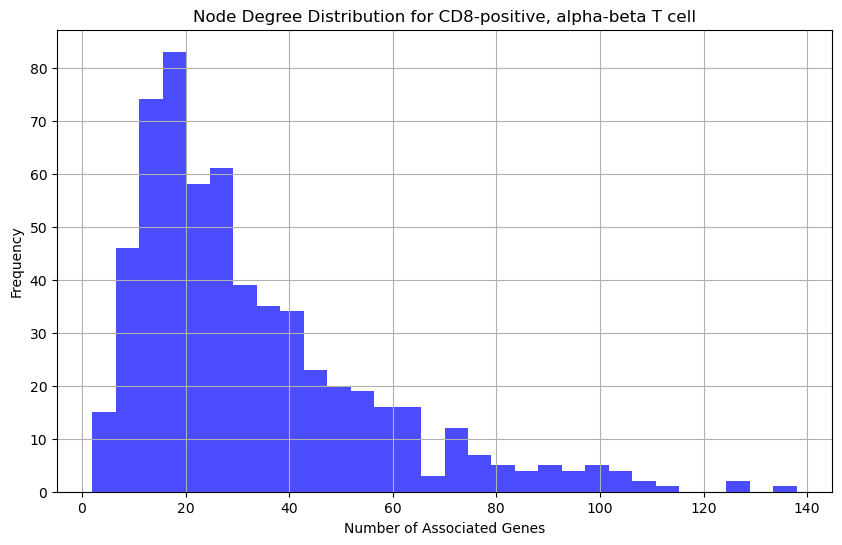

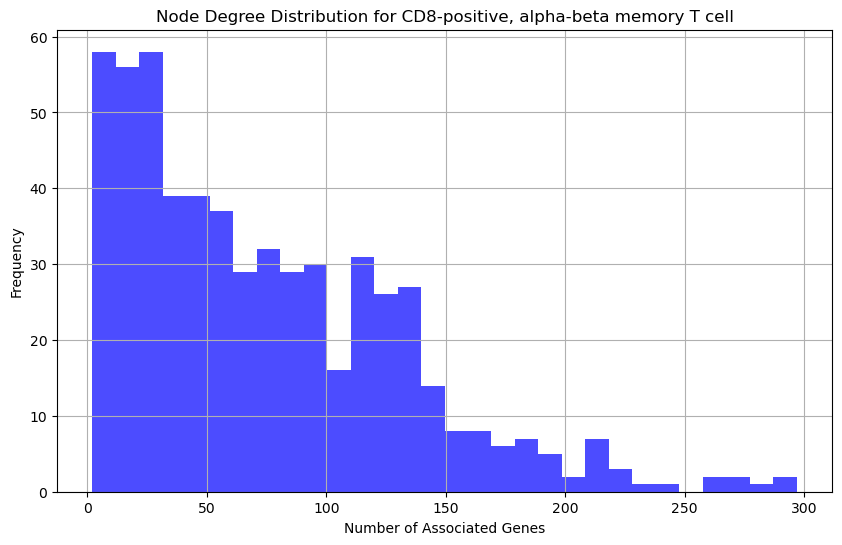

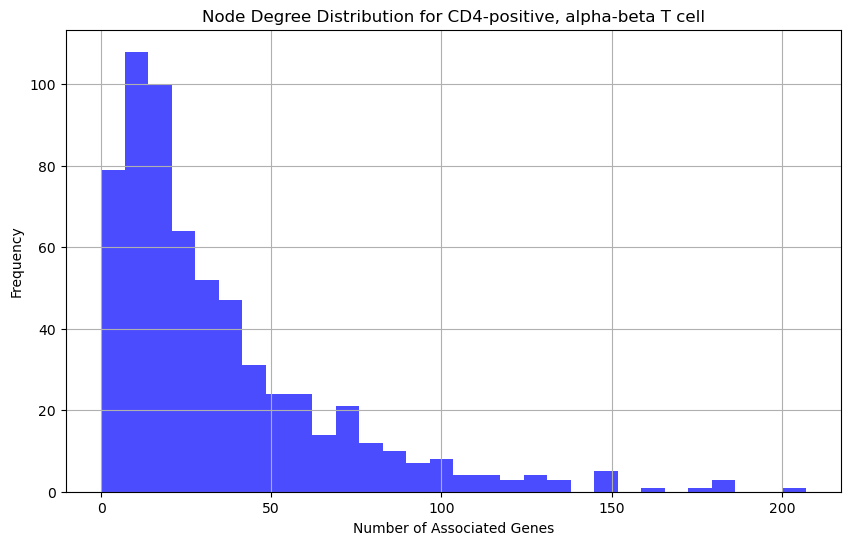

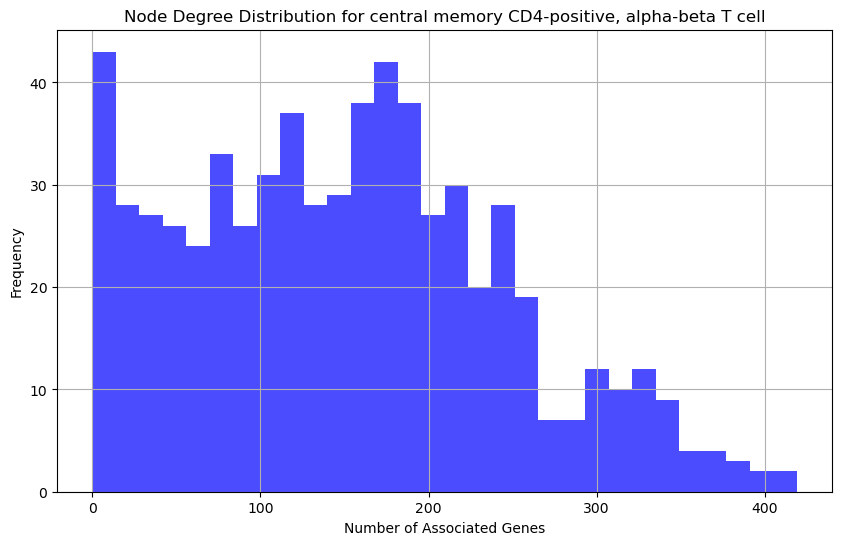

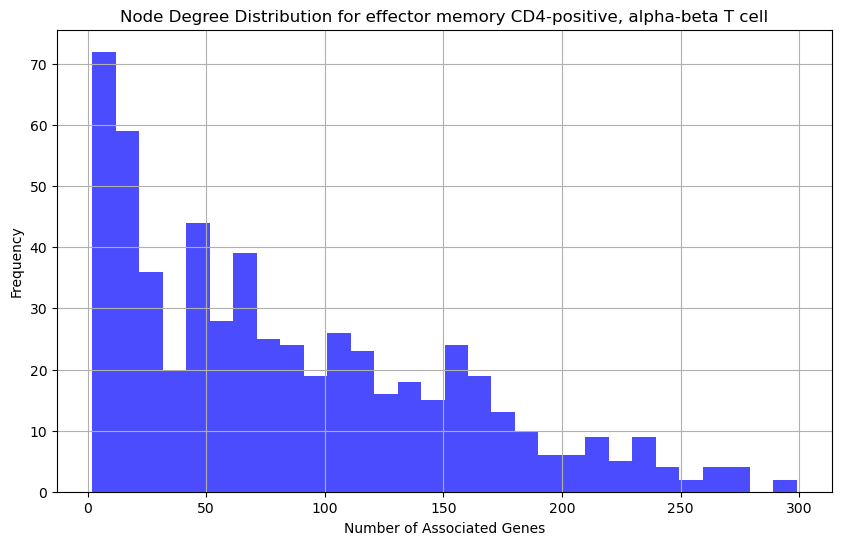

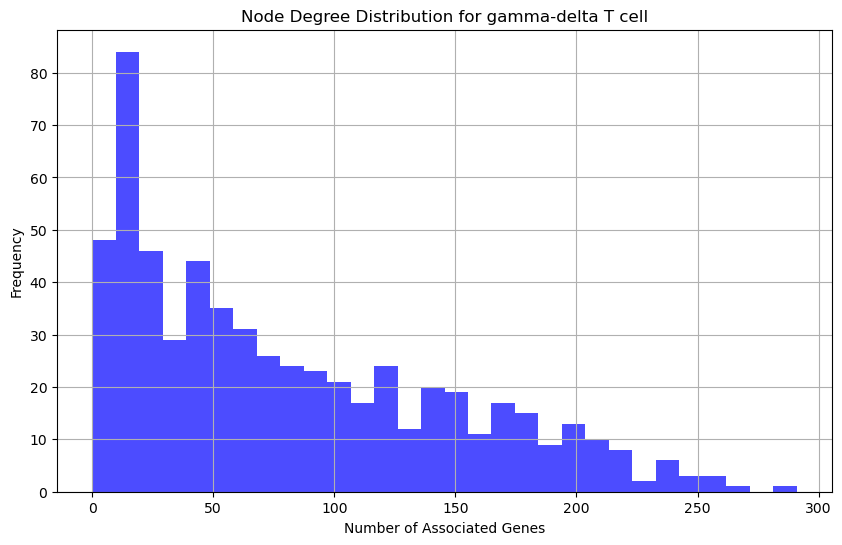

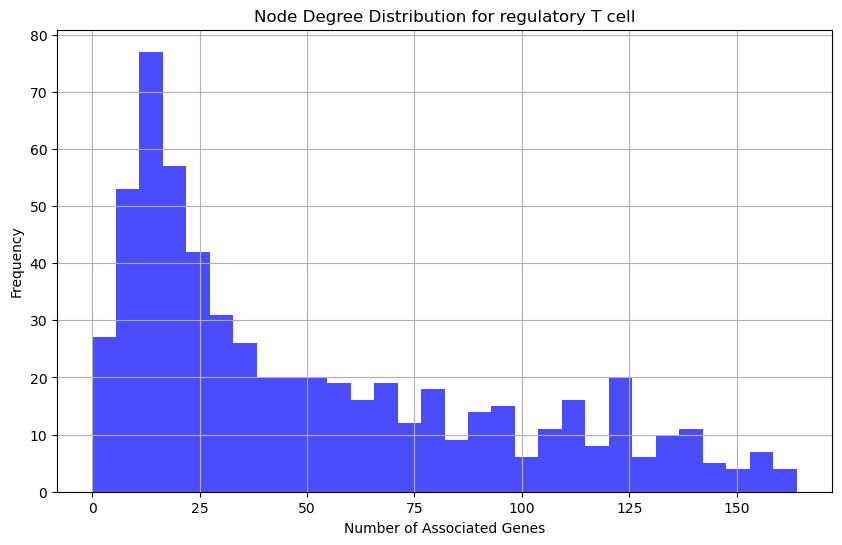

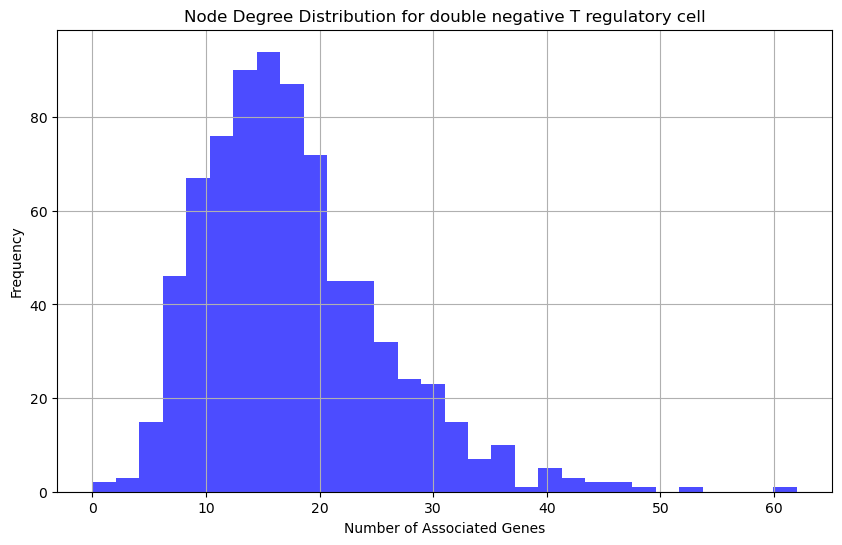

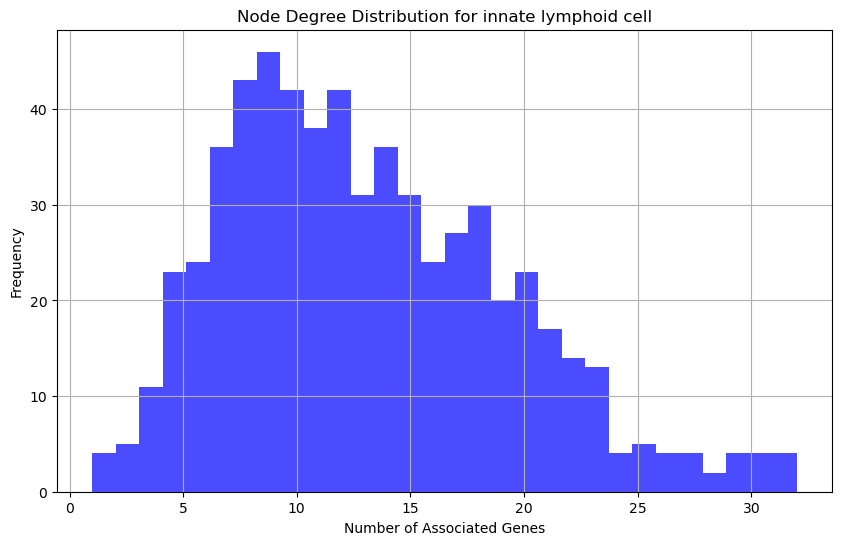

In [47]:
import matplotlib.pyplot as plt

# Now do it for all the cell types
for cell_type, df in excel_files_networks.items():
    # Count the number of association genes for each gene
    temp_df = df['Associated Genes'].apply(lambda x: len(x))
    
    # Remove the 'Associated Genes' column from the dataframe
    df = df.drop(columns=['Associated Genes'])
    
    # Add the number of associated genes to the dataframe
    df['Number of Associated Genes'] = temp_df
    
    # Rename the columns to 'Gene' and 'Number of Associated Genes'
    df.columns = ['Gene', 'Number of Associated Genes']
    
    # Plot the node degree distribution for each cell type
    plt.figure(figsize=(10, 6))
    plt.hist(df['Number of Associated Genes'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Node Degree Distribution for {cell_type}')
    plt.xlabel('Number of Associated Genes')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

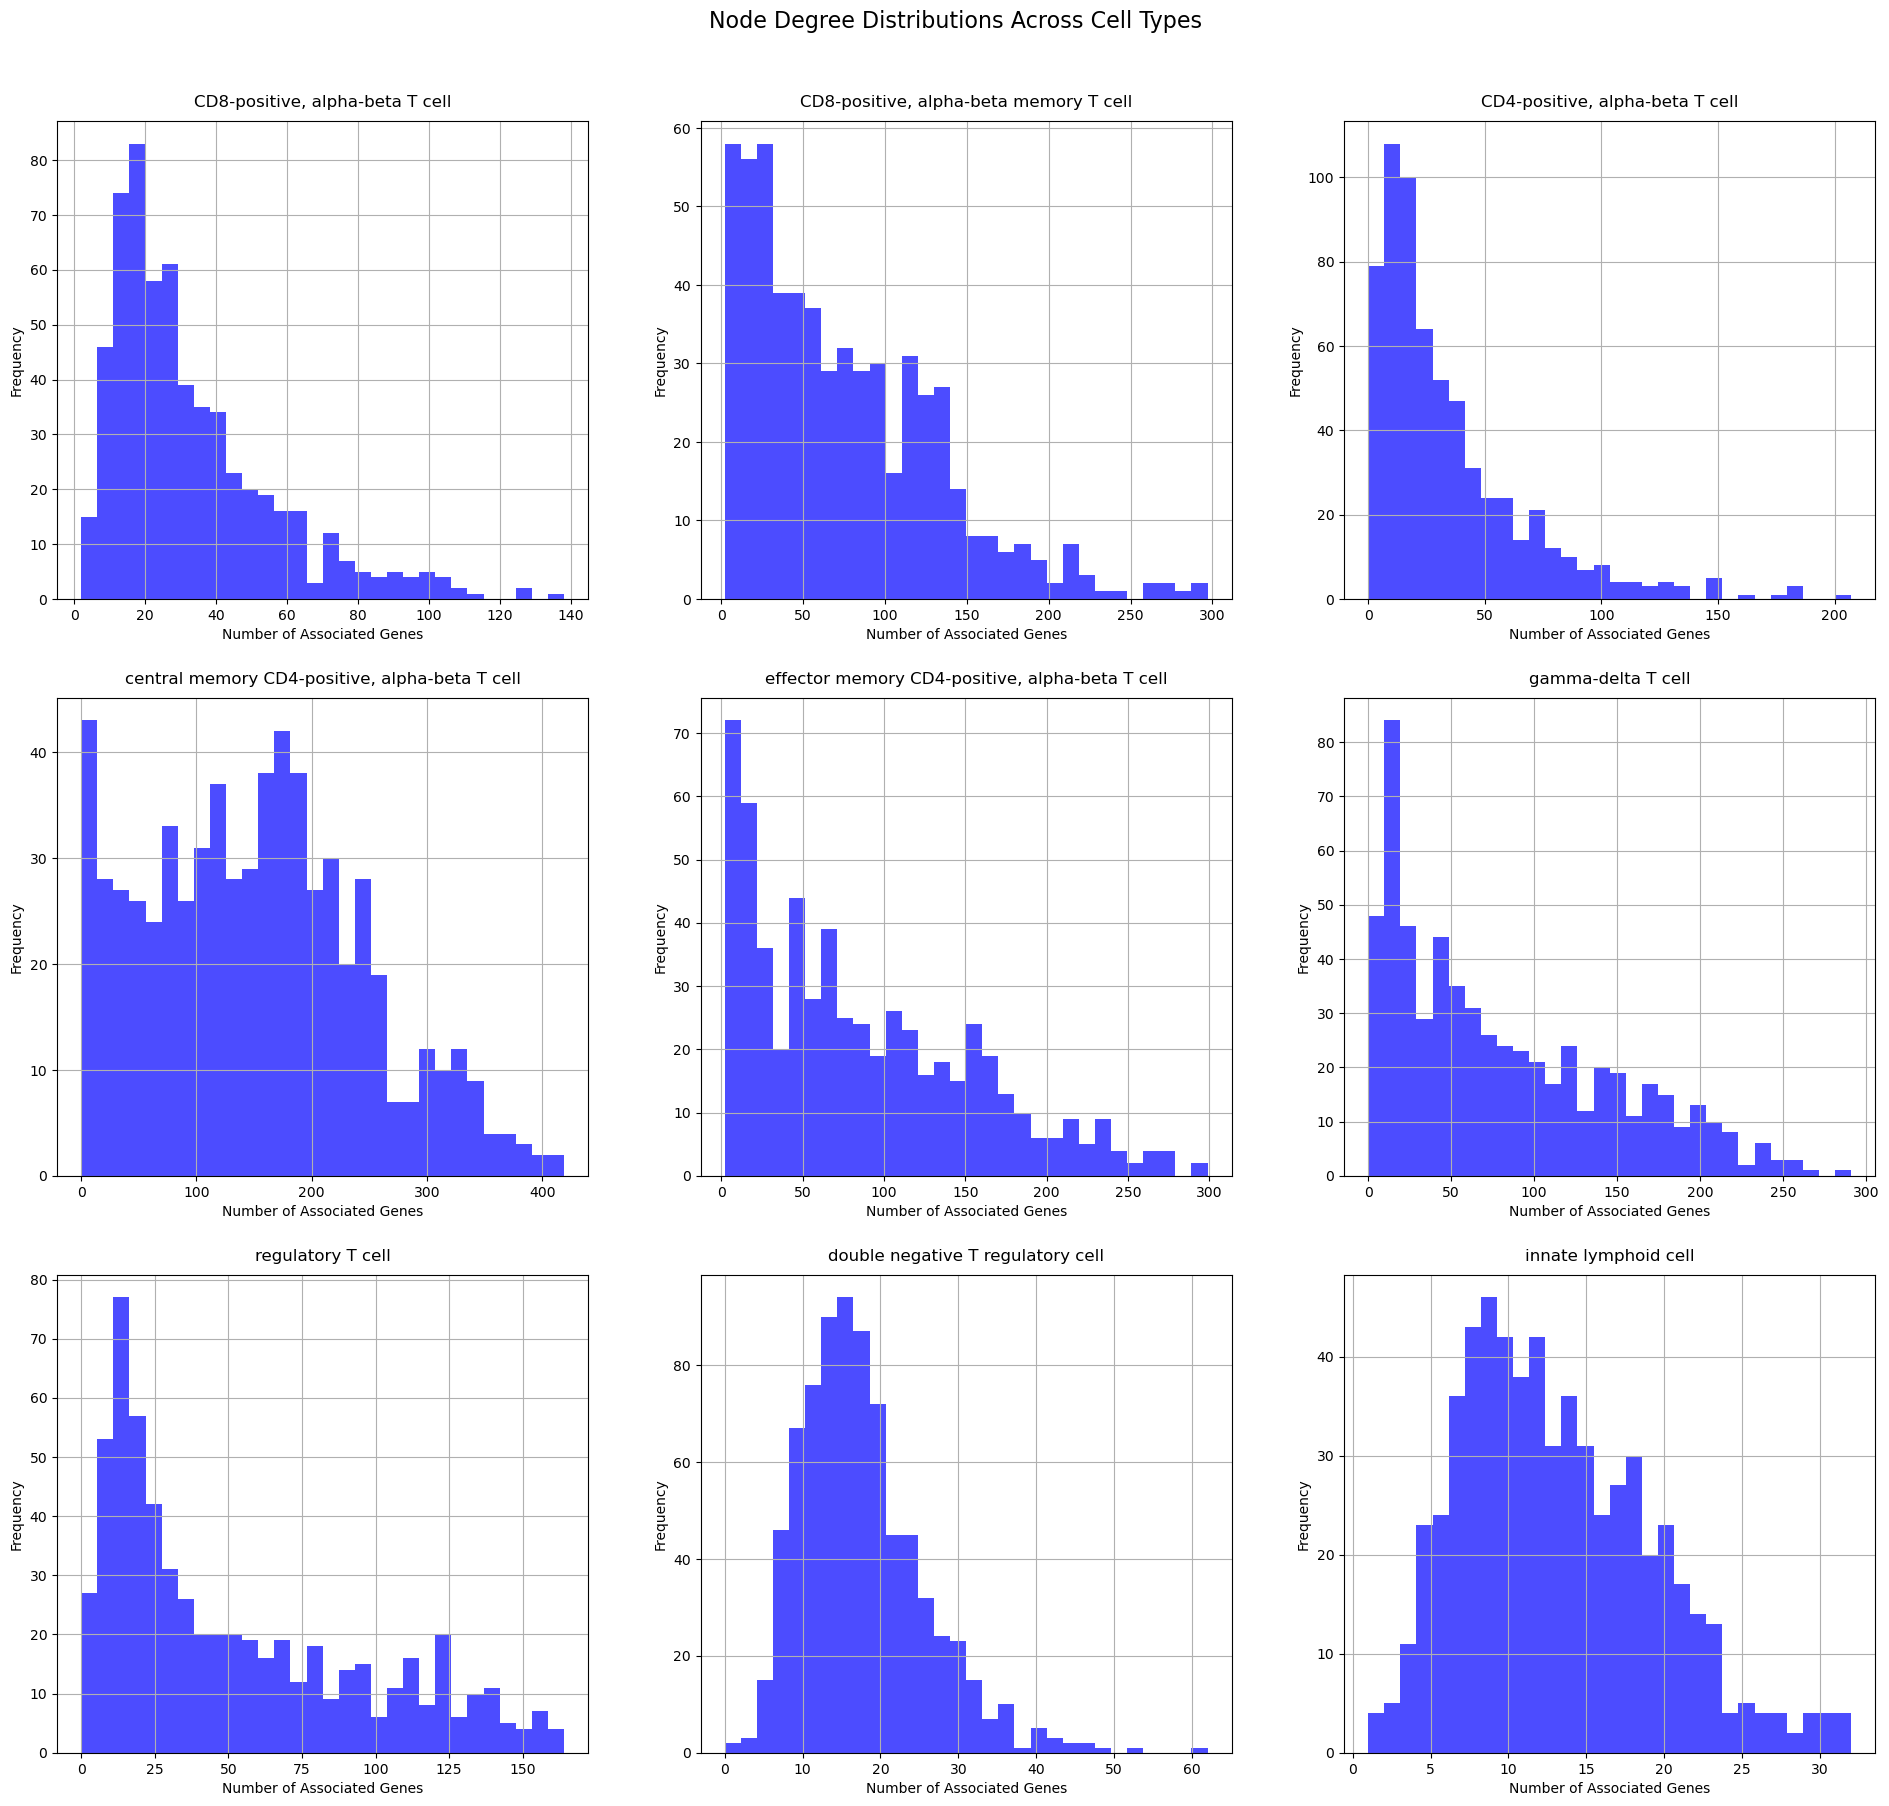

In [ ]:
# import matplotlib.pyplot as plt
# import math

# # Create a figure with subplots
# n_cols = 3  # Number of columns in the subplot grid
# n_cell_types = len(excel_files_networks)
# n_rows = math.ceil(n_cell_types / n_cols)  # Calculate needed rows

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
# fig.tight_layout(pad=5.0)  # Add padding between subplots

# # Flatten axes array for easy iteration
# axes = axes.flatten()

# # Now do it for all the cell types
# for i, (cell_type, df) in enumerate(excel_files_networks.items()):
#     # Count the number of association genes for each gene
#     temp_df = df['Associated Genes'].apply(lambda x: len(x))
    
#     # Create the dataframe for plotting
#     df_new = df.drop(columns=['Associated Genes']).copy()
#     df_new['Number of Associated Genes'] = temp_df
#     df_new.columns = ['Gene', 'Number of Associated Genes']
    
#     # Plot on the appropriate subplot
#     ax = axes[i]
#     ax.hist(df_new['Number of Associated Genes'], bins=30, color='blue', alpha=0.7)
#     ax.set_title(f'{cell_type}', pad=10)
#     ax.set_xlabel('Number of Associated Genes')
#     ax.set_ylabel('Frequency')
#     ax.grid(True)

# # Hide any unused subplots
# for j in range(i+1, len(axes)):
#     axes[j].axis('off')

# # Add a main title for the entire figure
# fig.suptitle('Node Degree Distributions Across Cell Types', fontsize=16, y=1.02)

# # Save and show
# plt.savefig('results/network/young_old/all_cell_types_node_degree_distributions.png', 
#             bbox_inches='tight', dpi=300)
# plt.show()


Cell Type: CD8-positive, alpha-beta T cell
Number of nodes: 594
Number of edges: 9803


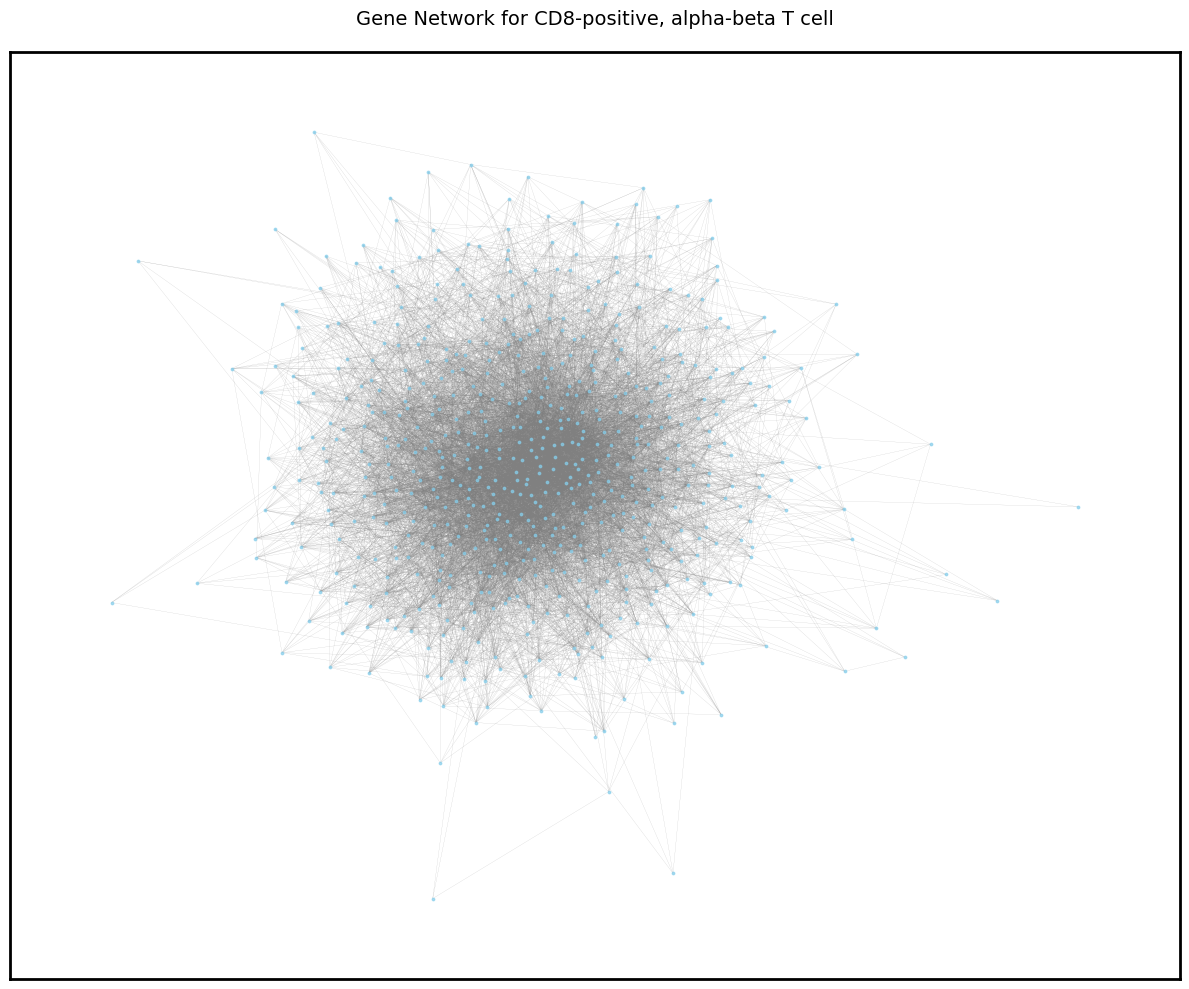


Cell Type: CD8-positive, alpha-beta memory T cell
Number of nodes: 576
Number of edges: 21393


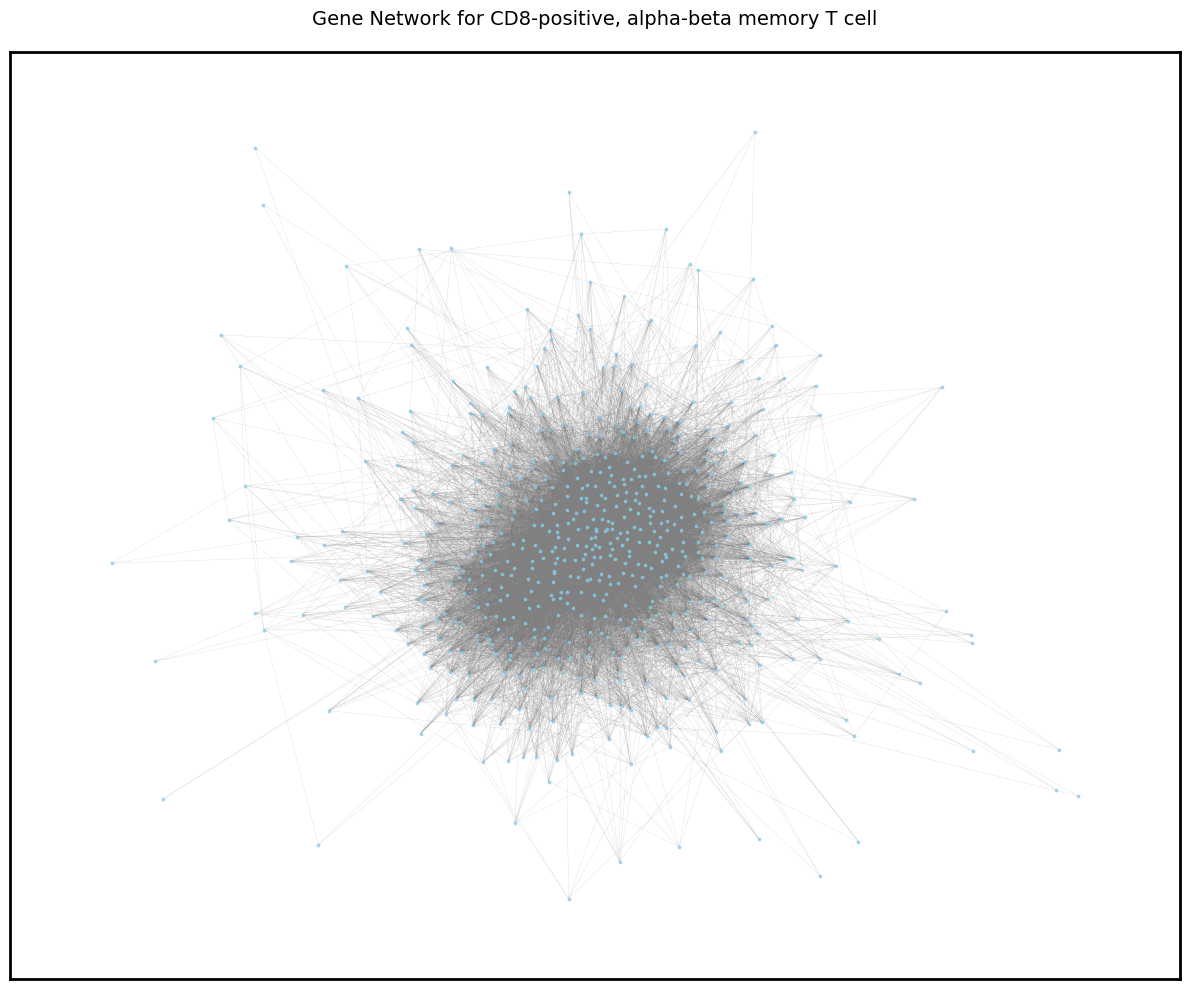


Cell Type: CD4-positive, alpha-beta T cell
Number of nodes: 630
Number of edges: 10835


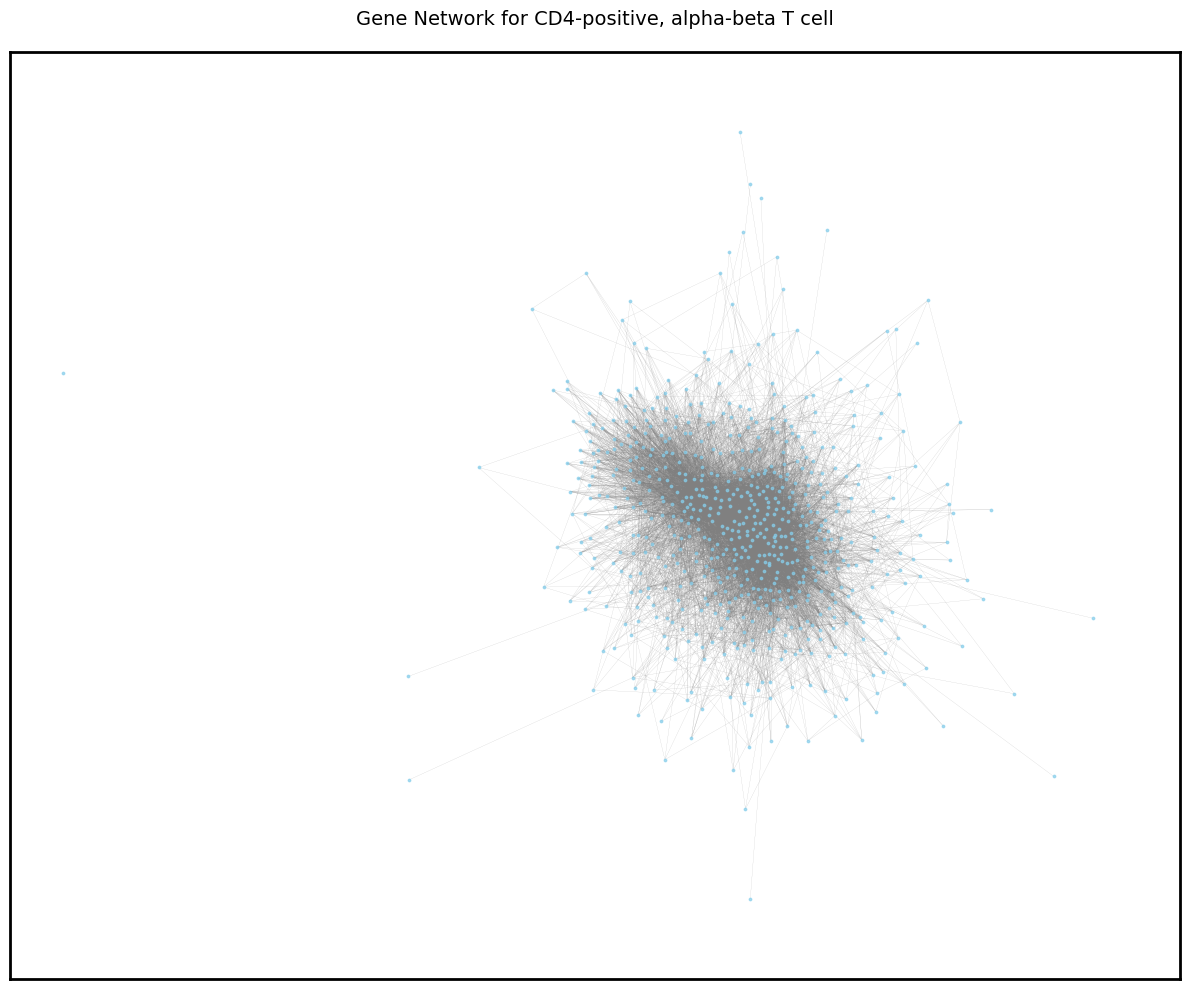


Cell Type: central memory CD4-positive, alpha-beta T cell
Number of nodes: 646
Number of edges: 48628


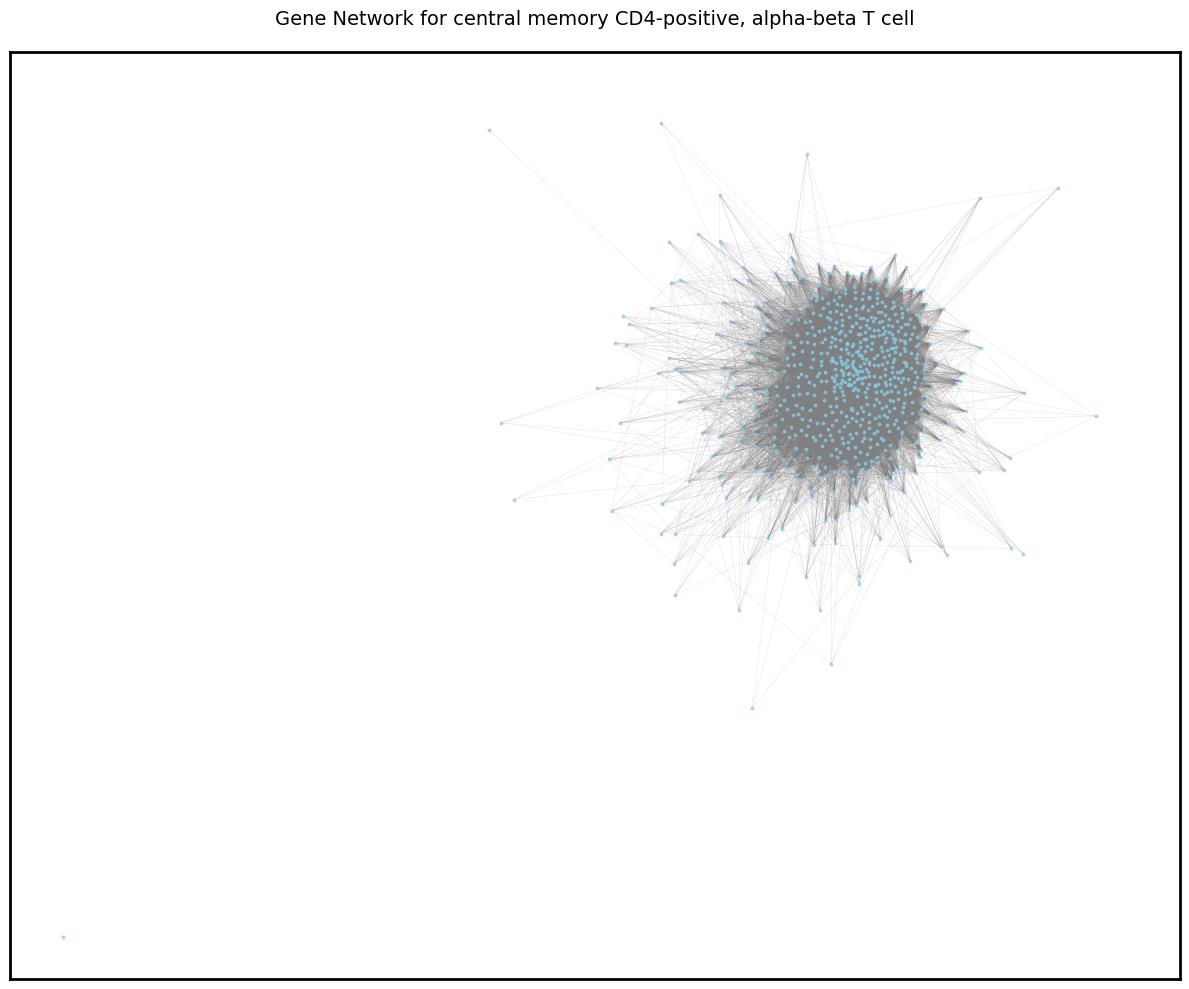


Cell Type: effector memory CD4-positive, alpha-beta T cell
Number of nodes: 581
Number of edges: 24961


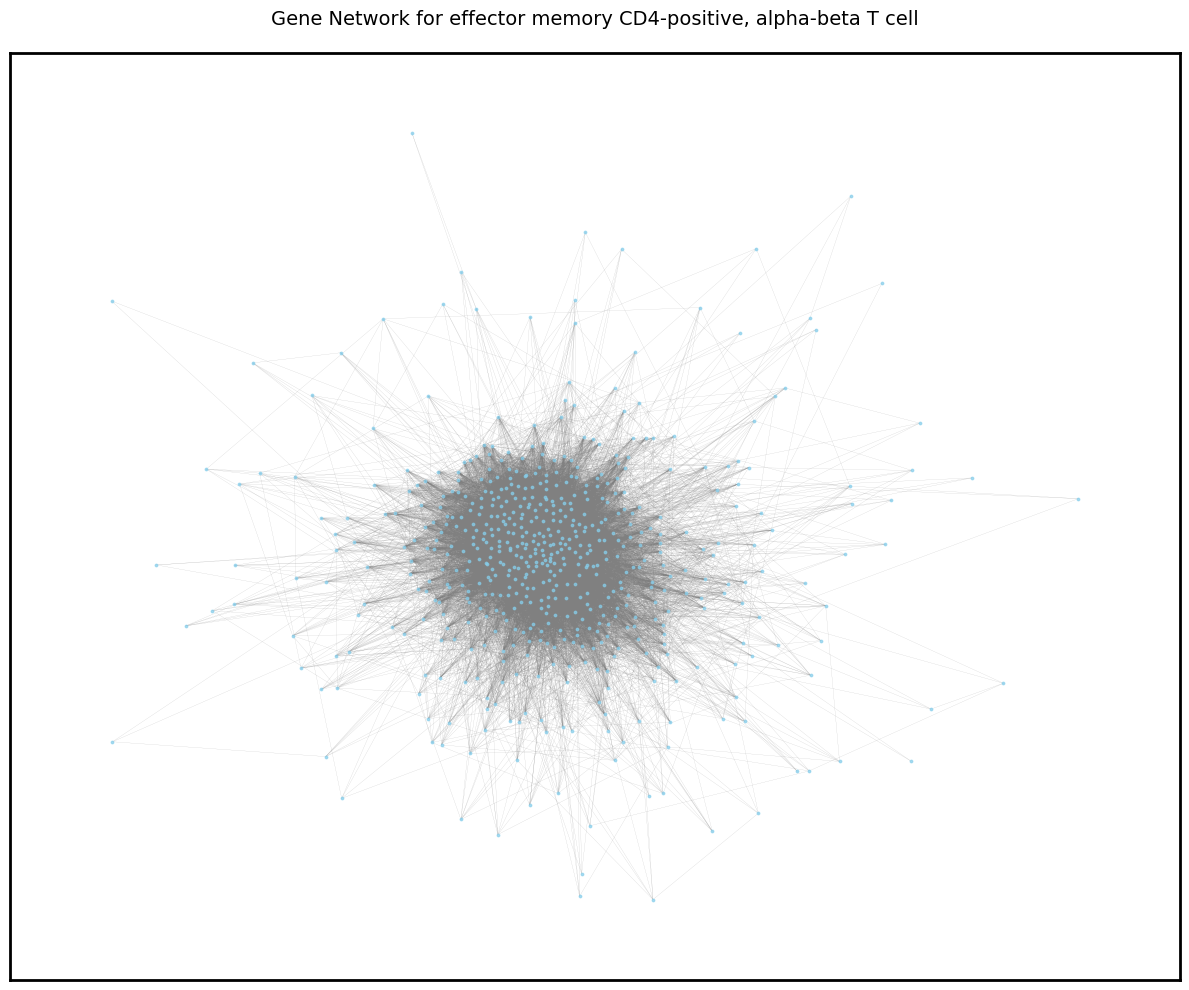


Cell Type: gamma-delta T cell
Number of nodes: 602
Number of edges: 24470


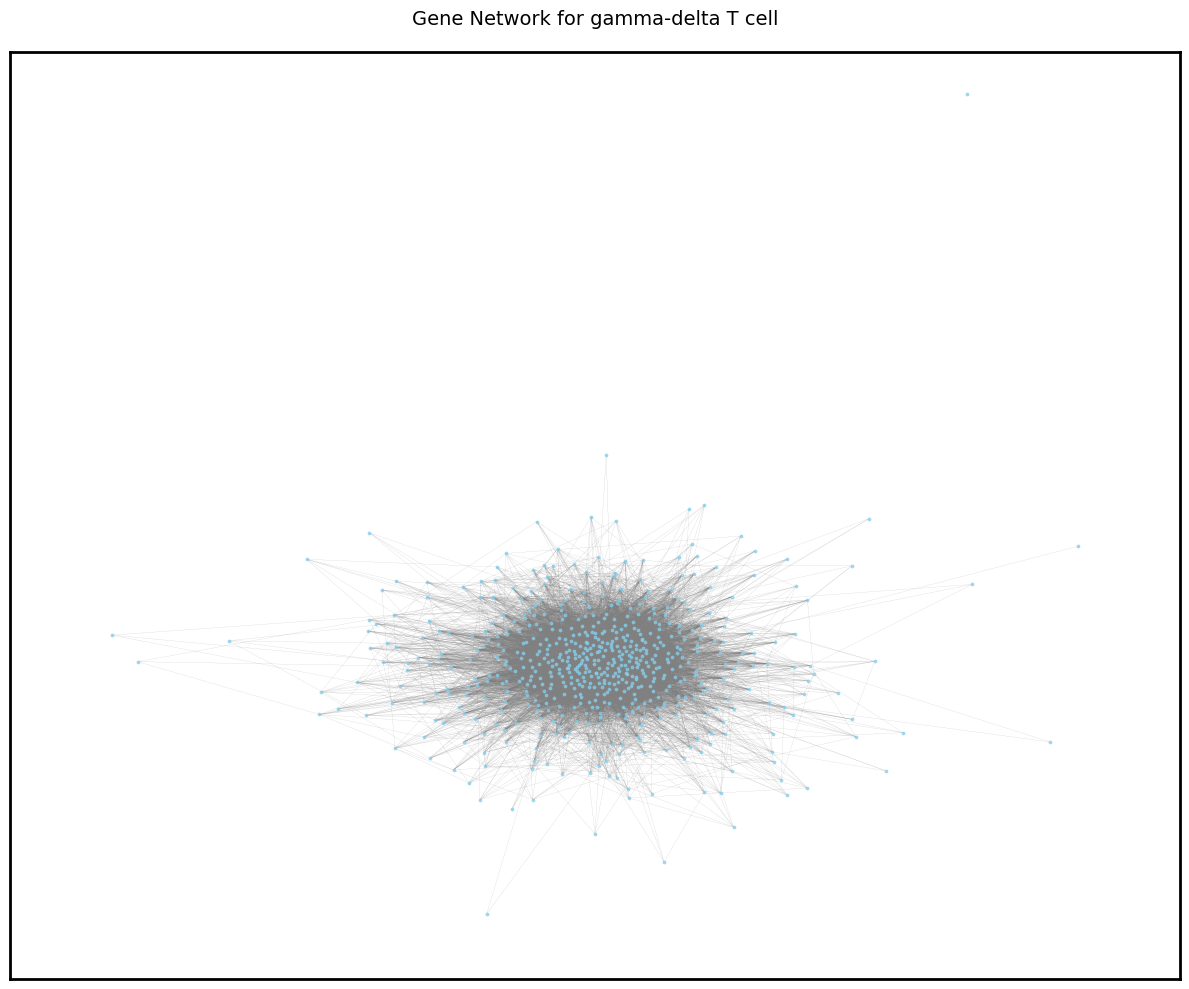


Cell Type: regulatory T cell
Number of nodes: 603
Number of edges: 15540


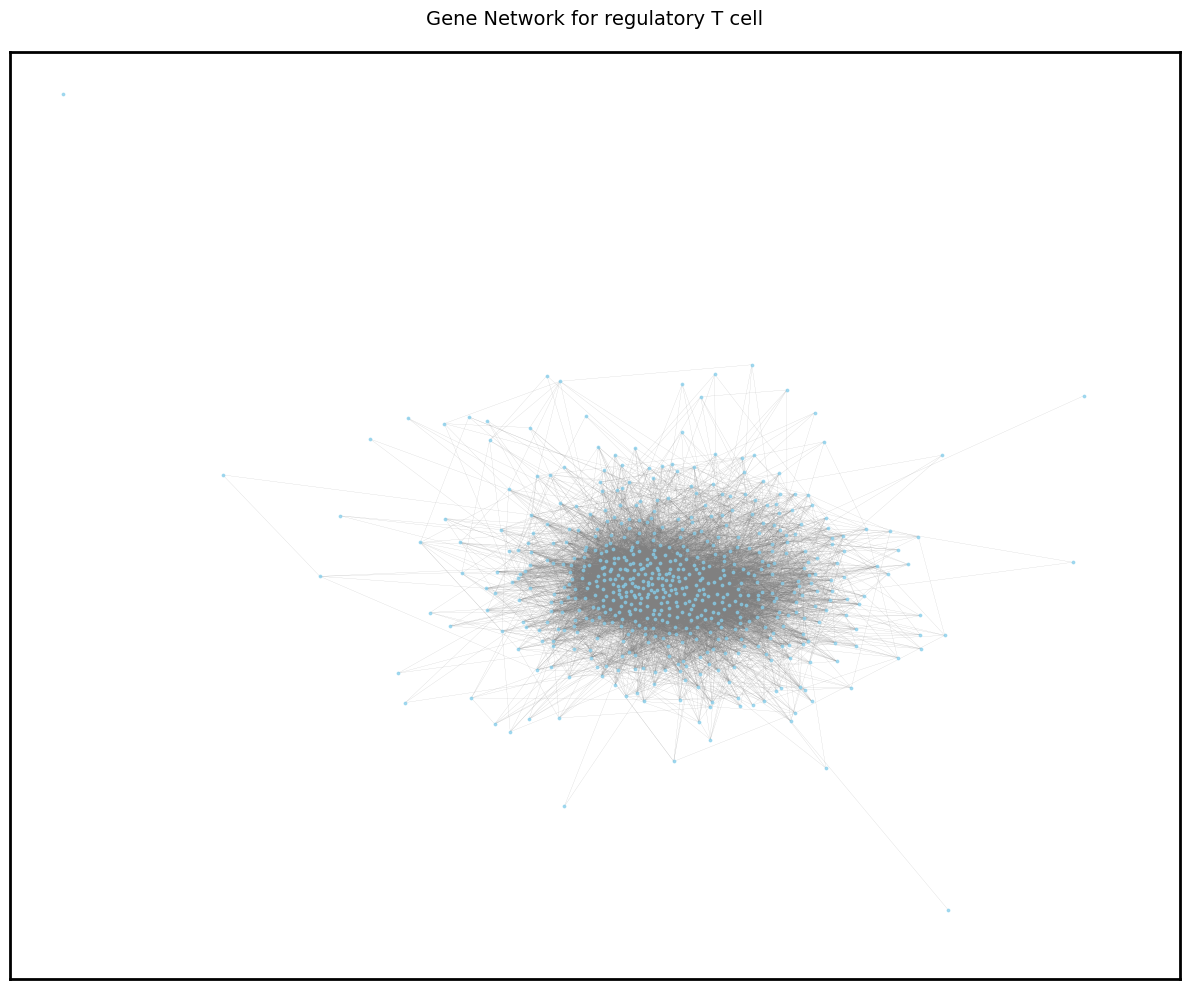


Cell Type: double negative T regulatory cell
Number of nodes: 769
Number of edges: 6769


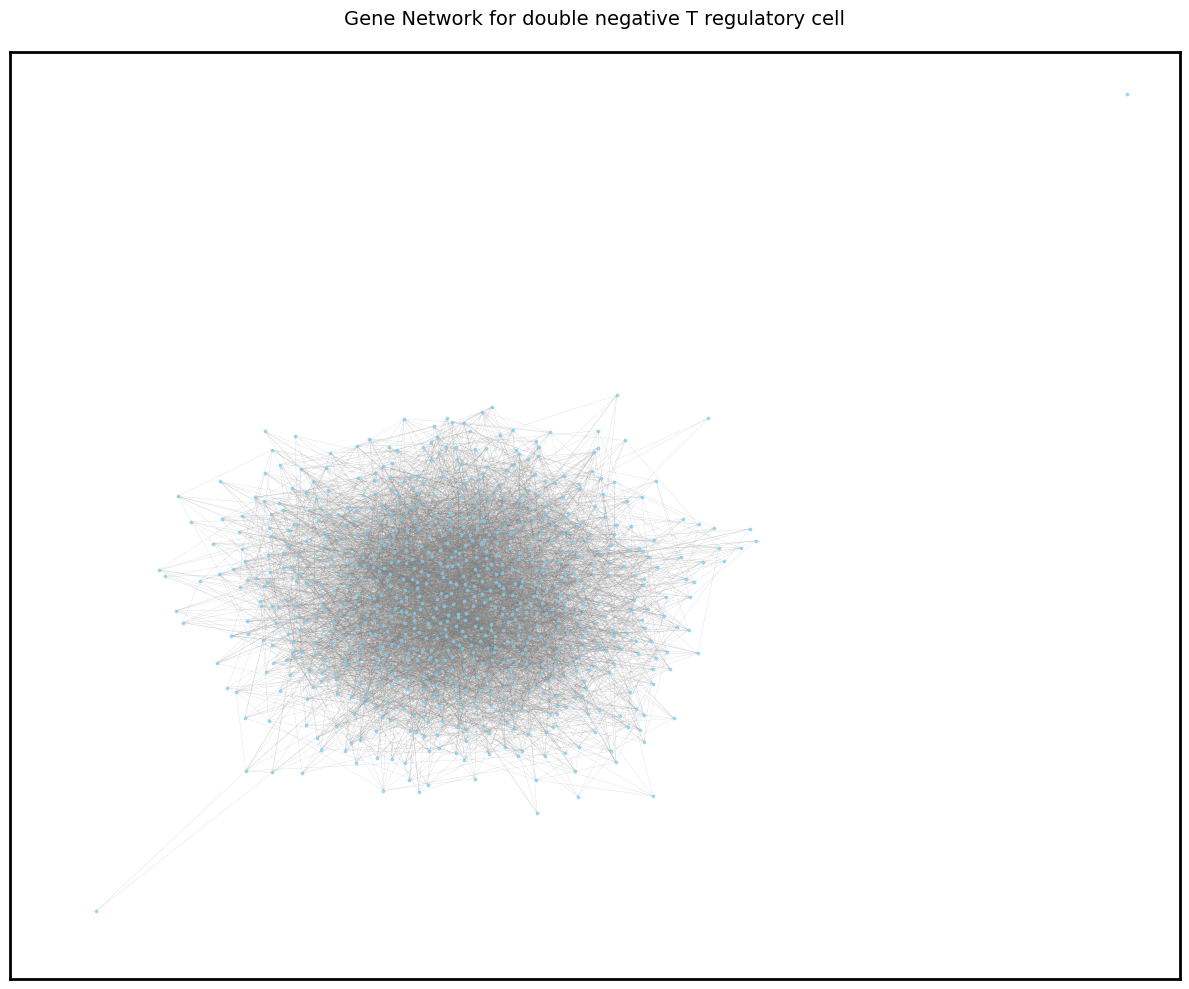


Cell Type: innate lymphoid cell
Number of nodes: 611
Number of edges: 4044


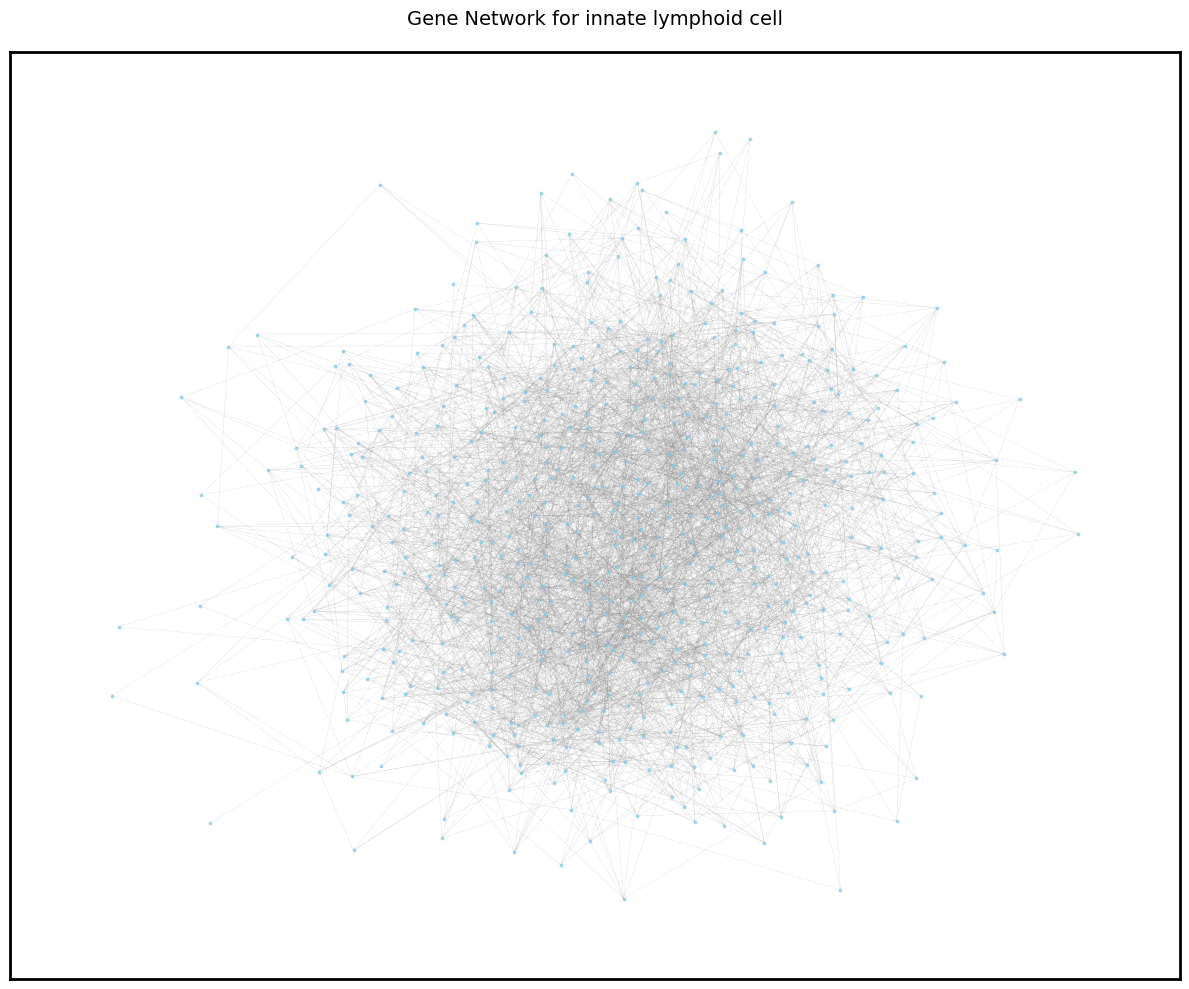

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph for each cell type
for cell_type, df in excel_files_networks.items():
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes and edges from the dataframe
    for index, row in df.iterrows():
        gene = row['Gene']
        associated_genes = row['Associated Genes']
        
        # Add the gene as a node
        G.add_node(gene)
        
        # Add edges to associated genes (if any)
        for associated_gene in associated_genes:
            G.add_edge(gene, associated_gene)
    
    # Convert to undirected for visualization
    G = G.to_undirected()
    
    # Print basic graph info
    print(f"\nCell Type: {cell_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Create visualization with black border
    plt.figure(figsize=(12, 10))
    
    # Add thick black border around the plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(2)  # Adjust thickness as needed
    
    pos = nx.spring_layout(G, k=0.15, iterations=50)
    
    nx.draw_networkx(
        G,
        pos=pos,
        with_labels=False,
        node_size=3,
        node_color="skyblue",
        width=0.1,
        edge_color="gray",
        font_size=1,
        alpha=0.7,
        ax=ax
    )
    
    plt.title(f"Gene Network for {cell_type}", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()